In [1]:
#запускаем библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Проверка гипотез по увеличению выручки в интернет-магазине — оценка результатов A/B теста.

Краткое описание проекта:
вместе с отделом маркетинга мы подготовили список из 9 гипотез для увеличения выручки.
В ходе исследования мы приоритизируем гипотезы и  проанализируем полученные результаты A/B-теста.

Цель прокта: 
по результатам анализа A/B-теста необходимо принять решение. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Описание данных:
мы имеем три датафрейма: 1 датафрейм с гипотезами и 2 датафрейма с результатами A/B-теста с данными о посетителях и заказах.

План работы: сначала мы сделаем предобработку данных, затем в первой части приоретизируем гипотезы, после  этого проведём анализ результатов A/B-теста, а именно: построим необходимые нам графики, избавимся от аномалий и посчитаем статистическую значимость различий групп А и В по нужным нам критериям.

In [ ]:
План работы: 
1. Предобработка данных.
2. Приоретизвция гипотез.
3. Анализ результатов A/B-теста, а именно: построить необходимые нам графики, избавиться от аномалий и посчитать статистическую значимость различий групп А и В по нужным нам критериям.
Вместе c отделом маркетинга мы подготовили список из 9 гипотез для увеличения выручки.
В ходе исследования мы приоритизируем гипотезы и проанализируем полученные результаты A/B-теста.
по результатам анализа A/B-теста необходимо принять решение. 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.
Имеются три датафрейма: 1 датафрейм с гипотезами и 2 датафрейма с результатами A/B-теста с данными о посетителях и заказах.


## Предобработка данных

In [3]:
pd.options.display.max_colwidth = 130
display(hypothesis.head())
display('*'*50)
display(orders.head())
display('*'*50)
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


'**************************************************'

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


'**************************************************'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [4]:
hypothesis.info()
hypothesis.isna().sum()
hypothesis.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


0

In [5]:
orders.info()
orders.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


0

In [6]:
visitors.info()
visitors.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


0

Пропусков нет, полных дубликатов тоже нет. В датасетах hypothesis и orders необходимо привести названия столбцов к единому виду.
Изменять типы данных не требуется.

In [7]:
hypothesis.columns = [x.lower().replace(' ', '_') for x in hypothesis.columns]
display(hypothesis.head())

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [8]:
orders = orders.rename(columns = {'transactionId' : 'transaction_id', 'visitorId':'visitor_id'})
display(orders.head())

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
display(orders['group'].unique())

print('Начальная дата {}, конечная дата {}'.format(orders['date'].min(), orders['date'].max()))
print('*'*50)

orders_A =orders.query('group == "A"')
orders_B =orders.query('group == "B"')

print("Количество человек в группе А:", orders_A.agg({'visitor_id':'nunique'}))
print("Количество человек в группе В:", orders_B.agg({'visitor_id':'nunique'}))
print('*'*50)

d=orders_A.merge(orders_B, how='inner', indicator = False, on=['visitor_id'])
print("Количество пользователей, попавших в обе группы:", d['visitor_id'].drop_duplicates().count()) #посмотрим общие строки
print('*'*50)
print("Количество пользователей:", orders.agg({'visitor_id':'nunique'}))
print('*'*50)
print("Количество заказов:", orders['transaction_id'].count())
print("Количество заказов в группе А:", orders_A['transaction_id'].count())
print("Количество заказов в группы В:", orders_B['transaction_id'].count())
print('*'*50)
print()
print("Всего прибыли:", orders['revenue'].sum())
print("Всего прибыли в группе A:", orders_A['revenue'].sum())
print("Всего прибыли в группе B:", orders_B['revenue'].sum())

array(['B', 'A'], dtype=object)

Начальная дата 2019-08-01, конечная дата 2019-08-31
**************************************************
Количество человек в группе А: visitor_id    503
dtype: int64
Количество человек в группе В: visitor_id    586
dtype: int64
**************************************************
Количество пользователей, попавших в обе группы: 58
**************************************************
Количество пользователей: visitor_id    1031
dtype: int64
**************************************************
Количество заказов: 1197
Количество заказов в группе А: 557
Количество заказов в группы В: 640
**************************************************

Всего прибыли: 9992563
Всего прибыли в группе A: 4084803
Всего прибыли в группе B: 5907760


<div class="alert alert-info"> <b></b> A/B-тест длился месяц. С 1 августа по 31 августа 2019 года
    
Количество пользователей в группах примерно одинаковое: 503 и 586 пользователей. 

Найдены 58 id пользователей, которые попали в обе группы, их необходимо удалить.

Заказов(1197) больше чем пользователей (1031), хороший знак. В группе B заказов больше - 640, чем в группе А - 557.

Всего прибыли = 9 992 563. С группы В получили больше прибыли - 5 907 760, чем с группы А - 4 084 803, примерно на 1 822 000. Это большая сумма
</div>

In [10]:
for i in orders['visitor_id']:#удалим пользователей, которые попали в обе группы
    if i in d['visitor_id'].unique():
        orders = orders.drop(orders[orders.visitor_id == i].index)  

In [11]:
orders['visitor_id'].count()

1016

<div class="alert alert-info"> <b></b>  Удалилось корректно. </div>

## Приоритизация гипотез

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [12]:
hypothesis['ICE']= hypothesis['impact'] *hypothesis['confidence']/hypothesis['efforts']
display(round(hypothesis[['hypothesis','ICE']].sort_values(by = 'ICE', ascending = False), 2))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Гипотеза под номером 8 наиболее приоритетна.

Наименее приоритетные гипотезы - под номерами: 1, 5, 3 и 4.

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [13]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
display(round(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending = False), 2))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

8-я гипотеза опустилась с 1-ого места до 5-ого,

0-ая гипотеза опустилась со 2-ого места на 3-е.

А 7-ая гипотеза поднялась с 3-его места на 1-ое. 

Гипотеза под номером 2 тоже поднялась, с 5-ого места на 2-ое.

4-ая гипотеза по-прежнему отстаётся на последнем месте.

В RICE мы учитываем, сколько пользователей затронет изменение (подключаем параметр Reach), поэтому приоретизация при применении RICE и ICE различается.

## Анализ A/B-теста

### Кумулятивные метрики

1 Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group,buyers,orders,revenue,visitors
0,2019-08-01,A,19,23,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,36,42,234381,1338
3,2019-08-02,B,39,40,221801,1294
4,2019-08-03,A,60,66,346854,1845


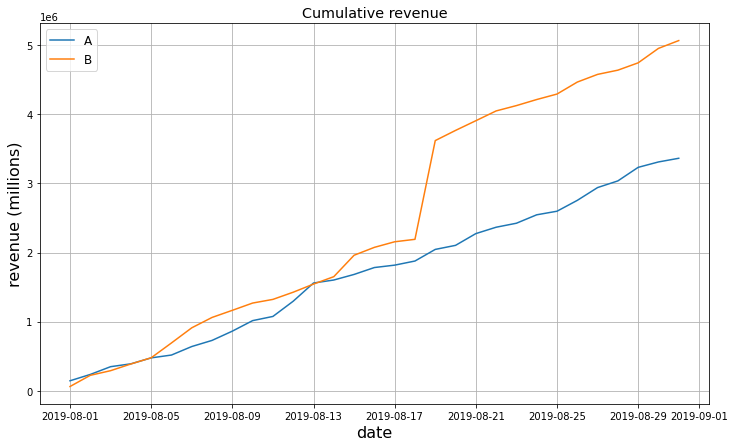

In [14]:
orders['date'] = orders['date'].map(
    lambda x:  pd.to_datetime(x)
)

visitors['date'] = visitors['date'].map(
    lambda x: pd.to_datetime(x)
)

display(orders.head(5))
display(visitors.head(5))

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitor_id' : pd.Series.nunique,
'transaction_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'buyers', 'orders' , 'revenue', 'visitors']
display(cumulativeData.head(5))

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.rcParams["figure.figsize"] = (12,7)
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.rcParams.update({'font.size': 12})

plt.grid(which='major')

plt.xlabel('date', fontsize=16)
plt.ylabel(r'revenue (millions)', fontsize=16)

plt.title(r'Сumulative revenue')

plt.legend() 

Выручка почти равномерно увеличивается в течение всего теста.

Однако в одной точке, выручка группы В резко выросла. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. 

Выручка группы А увеличивается равномерно.

2 Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

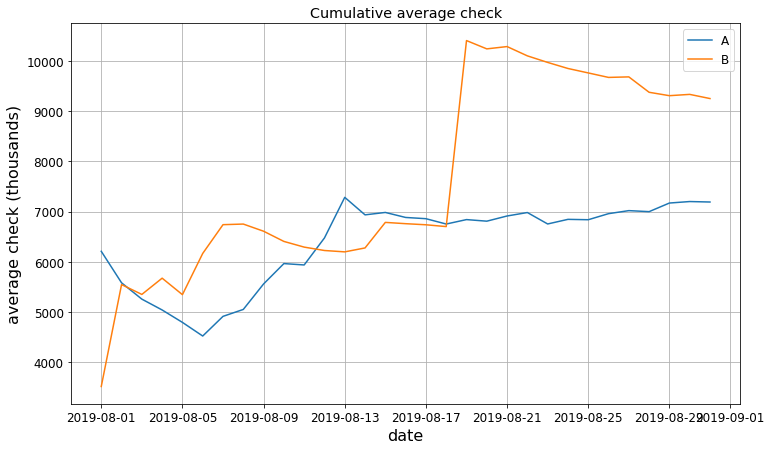

In [15]:
plt.rcParams["figure.figsize"] = (12,7)

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.rcParams.update({'font.size': 12})

plt.grid(which='major')

plt.xlabel('date', fontsize=16)
plt.ylabel(r'average check (thousands)', fontsize=16)

plt.title(r'Сumulative average check')

plt.legend() 

Суммы средних чеков в обеих группах нестабильны. Есть резкие спады и подъёмы. Это возможно в следствии выборосов - аномальных сумм. В одной точке группы В сумма среднего чека резко выросла, затем плавно пошла на спад. 

Под конец теста на протяжении 2х недель средние чеки группы В, после резкого подъёма, стабильно выше, чем в группе А.

3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

Text(0.5, 1.0, 'Относительное изменение кумулятивного среднего чека группы B к группе A')

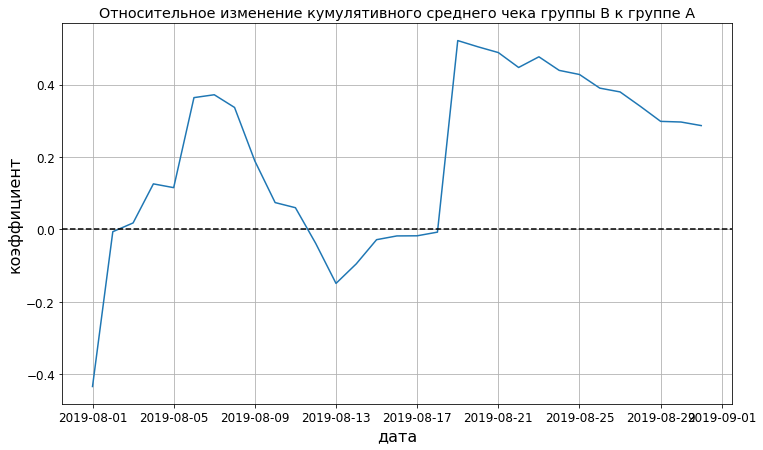

In [16]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.rcParams["figure.figsize"] = (12,7)
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.rcParams.update({'font.size': 12})

plt.grid(which='major')

plt.xlabel('дата', fontsize=16)
plt.ylabel(r'коэффициент', fontsize=16)

plt.title(r'Относительное изменение кумулятивного среднего чека группы B к группе A')

В нескольких точках график различия между сегментами резко скачет. Это может говорить о выбросах - о крупных суммах и крупных заказах.

4 Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

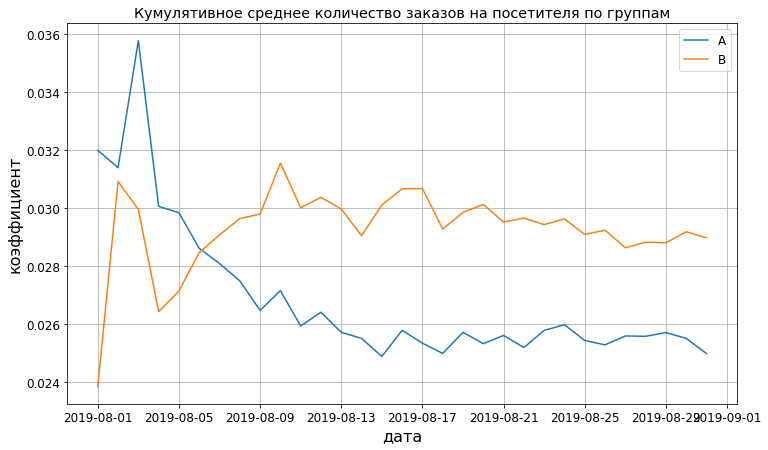

In [17]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.rcParams.update({'font.size': 12})

plt.grid(which='major')

plt.xlabel('дата', fontsize=16)
plt.ylabel(r'коэффициент', fontsize=16)

plt.title(r'Кумулятивное среднее количество заказов на посетителя по группам')

plt.legend()

In [18]:
cumulativeDataA['conversion'].mean()

0.026870768645692805

In [19]:
cumulativeDataB['conversion'].mean()

0.029282455691133105

Кумулятивное среднее количество заказов на посетителя выше у группы В. 

Также наблюдаются резкие скачки графиков. Скорее всего, по причине того, что в разные дни было разное количество заказов.

График первой недели можно не учитывать, так как в это время происходит стабилизация условий проведения теста. 

5 Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

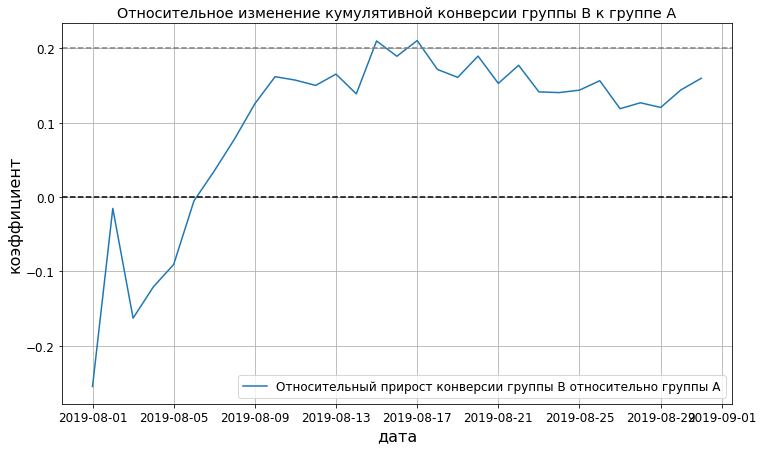

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.rcParams.update({'font.size': 12})

plt.grid(which='major')

plt.xlabel('дата', fontsize=16)
plt.ylabel(r'коэффициент', fontsize=16)

plt.title(r'Относительное изменение кумулятивной конверсии группы B к группе A')

plt.legend()

В целом, относительный прирост конверсии группы В относительно группы А достаточно высок.

### Анализ выбросов и всплесков

6 Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

,visitor_id,count_orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


Text(0.5, 1.0, 'Количество заказов по пользователям')

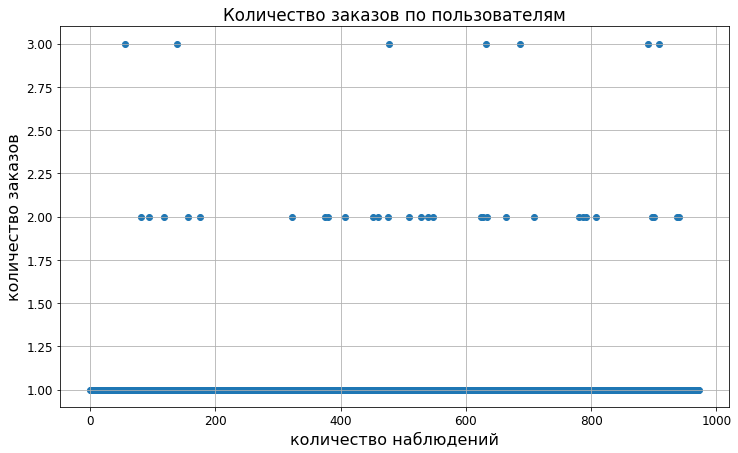

In [21]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'count_orders']

display(ordersByUsers.sort_values(by='count_orders', ascending=False).head())

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['count_orders']) 

plt.rcParams.update({'font.size': 14})

plt.grid(which='major')

plt.xlabel('количество наблюдений', fontsize=16)
plt.ylabel(r'количество заказов', fontsize=16)

plt.title(r'Количество заказов по пользователям')

По графику видно, что болшьше всего пользователи делают 1 заказ. 2 заказа и более делают редко.

Text(0.5, 1.0, 'Гистрограмма количества заказов на пользователя')

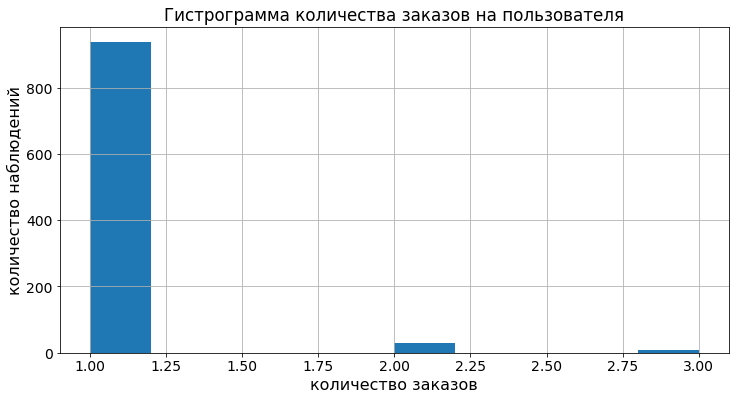

In [22]:
plt.rcParams["figure.figsize"] = (12,6)

plt.grid(which='major')
plt.hist(ordersByUsers['count_orders'], bins = 10)

plt.xlabel('количество заказов', fontsize=16)
plt.ylabel(r'количество наблюдений', fontsize=16)
plt.title('Гистрограмма количества заказов на пользователя')

7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [23]:
print(np.percentile(ordersByUsers['count_orders'], [90, 95.0, 99])) 

[1. 1. 2.]


Только 3% пользователей делают больше 3х заказов включительно, а около 1% посетителей делают больше 4х заказов.

In [24]:
ordersByUsers.query('count_orders > 3').count()

visitor_id      0
count_orders    0
dtype: int64

Граница для определения аномальных пользователей - 3 заказа, то есть посетители, сделавшие больше 3х заказов будут исключены, это примерно 1.2% данных.

8 Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

8300.814960629921

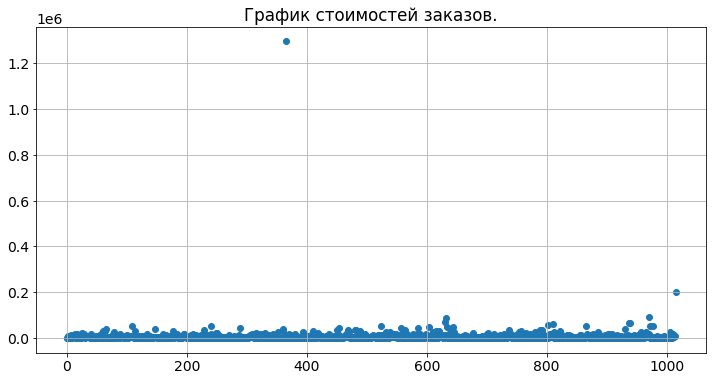

In [25]:
orders['date'] =orders['date'].map(lambda x:  pd.to_datetime(x))

#print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders)))

plt.scatter(x_values, orders['revenue'])

plt.rcParams["figure.figsize"] = (12,6)

plt.grid(which='major')
plt.title('График стоимостей заказов.')

orders['revenue'].mean()

<div class="alert alert-info">Так как есть несколько сильных выбросов, сложно определить стоимость основной части заказов. Удалим выбросы и снова построим такой график. </div>

Text(0.5, 1.0, 'Гистрограмма количества заказов на пользователя')

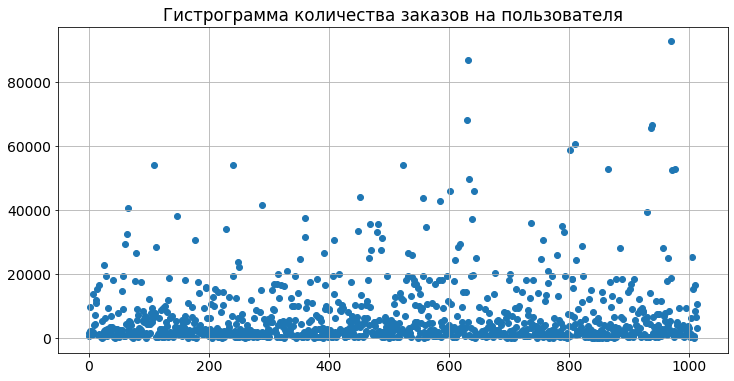

In [26]:
r = orders.loc[orders['revenue'] < 200000]

plt.rcParams["figure.figsize"] = (12,6)

plt.grid(which='major')

x_values = pd.Series(range(0, len(r)))

plt.scatter(x_values, r['revenue'])

plt.title('Гистрограмма количества заказов на пользователя')

<div class="alert alert-info"> <b></b> БОльшая часть заказов имеет стоимость до 20 000, но заказов больше этой суммы тоже много. </div>

In [27]:
orders['revenue'].mean()

8300.814960629921

Наблюдаются выбросы, средняя стоимость заказов - 8 350.

Теперь определим максимальную стоимость заказов, которые войдут в исследование.

9 Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [28]:
print(np.percentile(orders['revenue'], [95, 99]))
#print(orders['revenue'].max())
#orders.query('revenue >= 58233.2').sort_values(by='revenue')
#orders.query('revenue < 18168').sort_values(by='revenue', ascending = False)

[26785. 53904.]


In [29]:
orders.query('revenue > 45000').count()

transaction_id    18
visitor_id        18
date              18
revenue           18
group             18
dtype: int64

Отавим заказы, с крайней стоимостью в 45 000. Удалим около 2% данных.

### Принятие решения по результатам теста

10 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

Сформулируем нулевую и альтернативную гипотезы:

Н0: "Статистически значимых различий между группами нет."


H1: "Есть статистически значимые различия между группами."

In [30]:
alpha = 0.05

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'count_orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'count_orders']

sampleA = pd.concat(
    [
        ordersByUsersA['count_orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['count_orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['count_orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['count_orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p_value:", "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))


print("Различие в средних:", "{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


p_value: 0.01102
Различие в средних: 0.160


Первое число — p-value = 0.01679 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 

Относительный выигрыш группы B равен 13.8% 

 Среднее количество заказов на посетителя в группе В больше, чем в группе А.

11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Сформулируем нулевую и альтернативную гипотезы:

Н0: "Статистически значимых различий между группами нет."

H1: "Есть статистически значимые различия между группами."

In [31]:
alpha = 0.05
print("p-value:", '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Oтносительное различие среднего чека между сегментами:", '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
Oтносительное различие среднего чека между сегментами: 0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

Разница между группами примерно 26%

12 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

Сформулируем нулевую и альтернативную гипотезы:

Н0: "Статистически значимых различий между группами нет."

H1: "Есть статистически значимые различия между группами."

In [32]:
alpha = 0.05

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['count_orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['count_orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 25000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['count_orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['count_orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['count_orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['count_orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value:", '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Различия в среднем количестве заказов на посетителя между группами по «очищенным» данным:", '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

568     113298937
1099    148427295
461     154576532
928     204675465
33      249864742
Name: visitor_id, dtype: int64
p-value: 0.01885
Различия в среднем количестве заказов на посетителя между группами по «очищенным» данным: 0.171


p-value меньше 0.05, значит отвергаем нулевую гипотезу, различия в среднем количестве заказов на посетителя между группами есть!

В группе В на 15% больше заказов на 1 пользователя.

13 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

Сформулируем нулевую и альтернативную гипотезы:

Н0: "Статистически значимых различий между группами нет."

H1: "Есть статистически значимые различия между группами."

In [33]:
alpha = 0.05

print("p-value:", '{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                                                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Различия в среднем чеке заказа между группами по «очищенным» данным:"
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.475
Различия в среднем чеке заказа между группами по «очищенным» данным:-0.088


p-value больше 0.05, значит гипотезу о том, что различий в среднем чеке заказа между группами нет, отвергнуть не получилось. Разница между группами сократилась с 26% до 7%.

Мы избавились от выбросов, поэтому получили более точный результат и сократилось различие средних. При этом наблюдаемые различия не являются значимыми при таком уровне значимости.

<div class="alert alert-info"> Примем решение по результатам теста и объясним его. Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.</div>

<div class="alert alert-info">Вывод: в группе В на человека приходится больше заказов, чем в группе А, а вот средний чек в обеих группах примерно одинаков.

Из этого можно сказать, что группа В победила и тест можно останавливать.</div>

<div class="alert alert-info">В ходе исследования мы приоретизировали гипотезы, избавились от аномалий в данных, проанализировали результаты А/B-теста с помощью кумулятивных метрик и измерений статистических значимостей, а также приняли верное решение - остановить A/B-тест.

Результат анализа А/B-теста: средний чек в группе B не изменился относительно контрольной группы А, а вот количество заказов на одного пользователя в группе В значительно больше, чем в группе А. Это говорит о том, что благодаря внесённым изменениям пользователи стали делать больше заказов, это значит, что суммарная выручка будет гораздо больше, чем до внесения изменений.
Можно сделать вывод, что изменения в интернет-магазине эффективны.</div>